In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ocsGKhPzwzE8HfhxtLXr")
project = rf.workspace("tanishka-p3e2d").project("cataract-detection-s9s5t-fh4ec")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cataract-detection-2 in yolov8:: 100%|██████████| 2026/2026 [00:00<00:00, 7776.71it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/cataract-detection-2/data.yaml epochs=30 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/cataract-detection-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

/content
['train2', 'train']
Files in /content/runs/detect/train2:
['P_curve.png', 'results.png', 'args.yaml', 'events.out.tfevents.1731606148.cb7a22d6e37a.1810.0', 'val_batch2_labels.jpg', 'confusion_matrix.png', 'train_batch1040.jpg', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'train_batch1041.jpg', 'weights', 'R_curve.png', 'PR_curve.png', 'labels_correlogram.jpg', 'results.csv', 'train_batch1042.jpg', 'val_batch2_pred.jpg', 'val_batch1_pred.jpg', 'train_batch0.jpg', 'val_batch1_labels.jpg', 'confusion_matrix_normalized.png', 'F1_curve.png', 'train_batch1.jpg', 'labels.jpg', 'train_batch2.jpg']
Files in /content/runs/detect/train:
['args.yaml', 'weights']


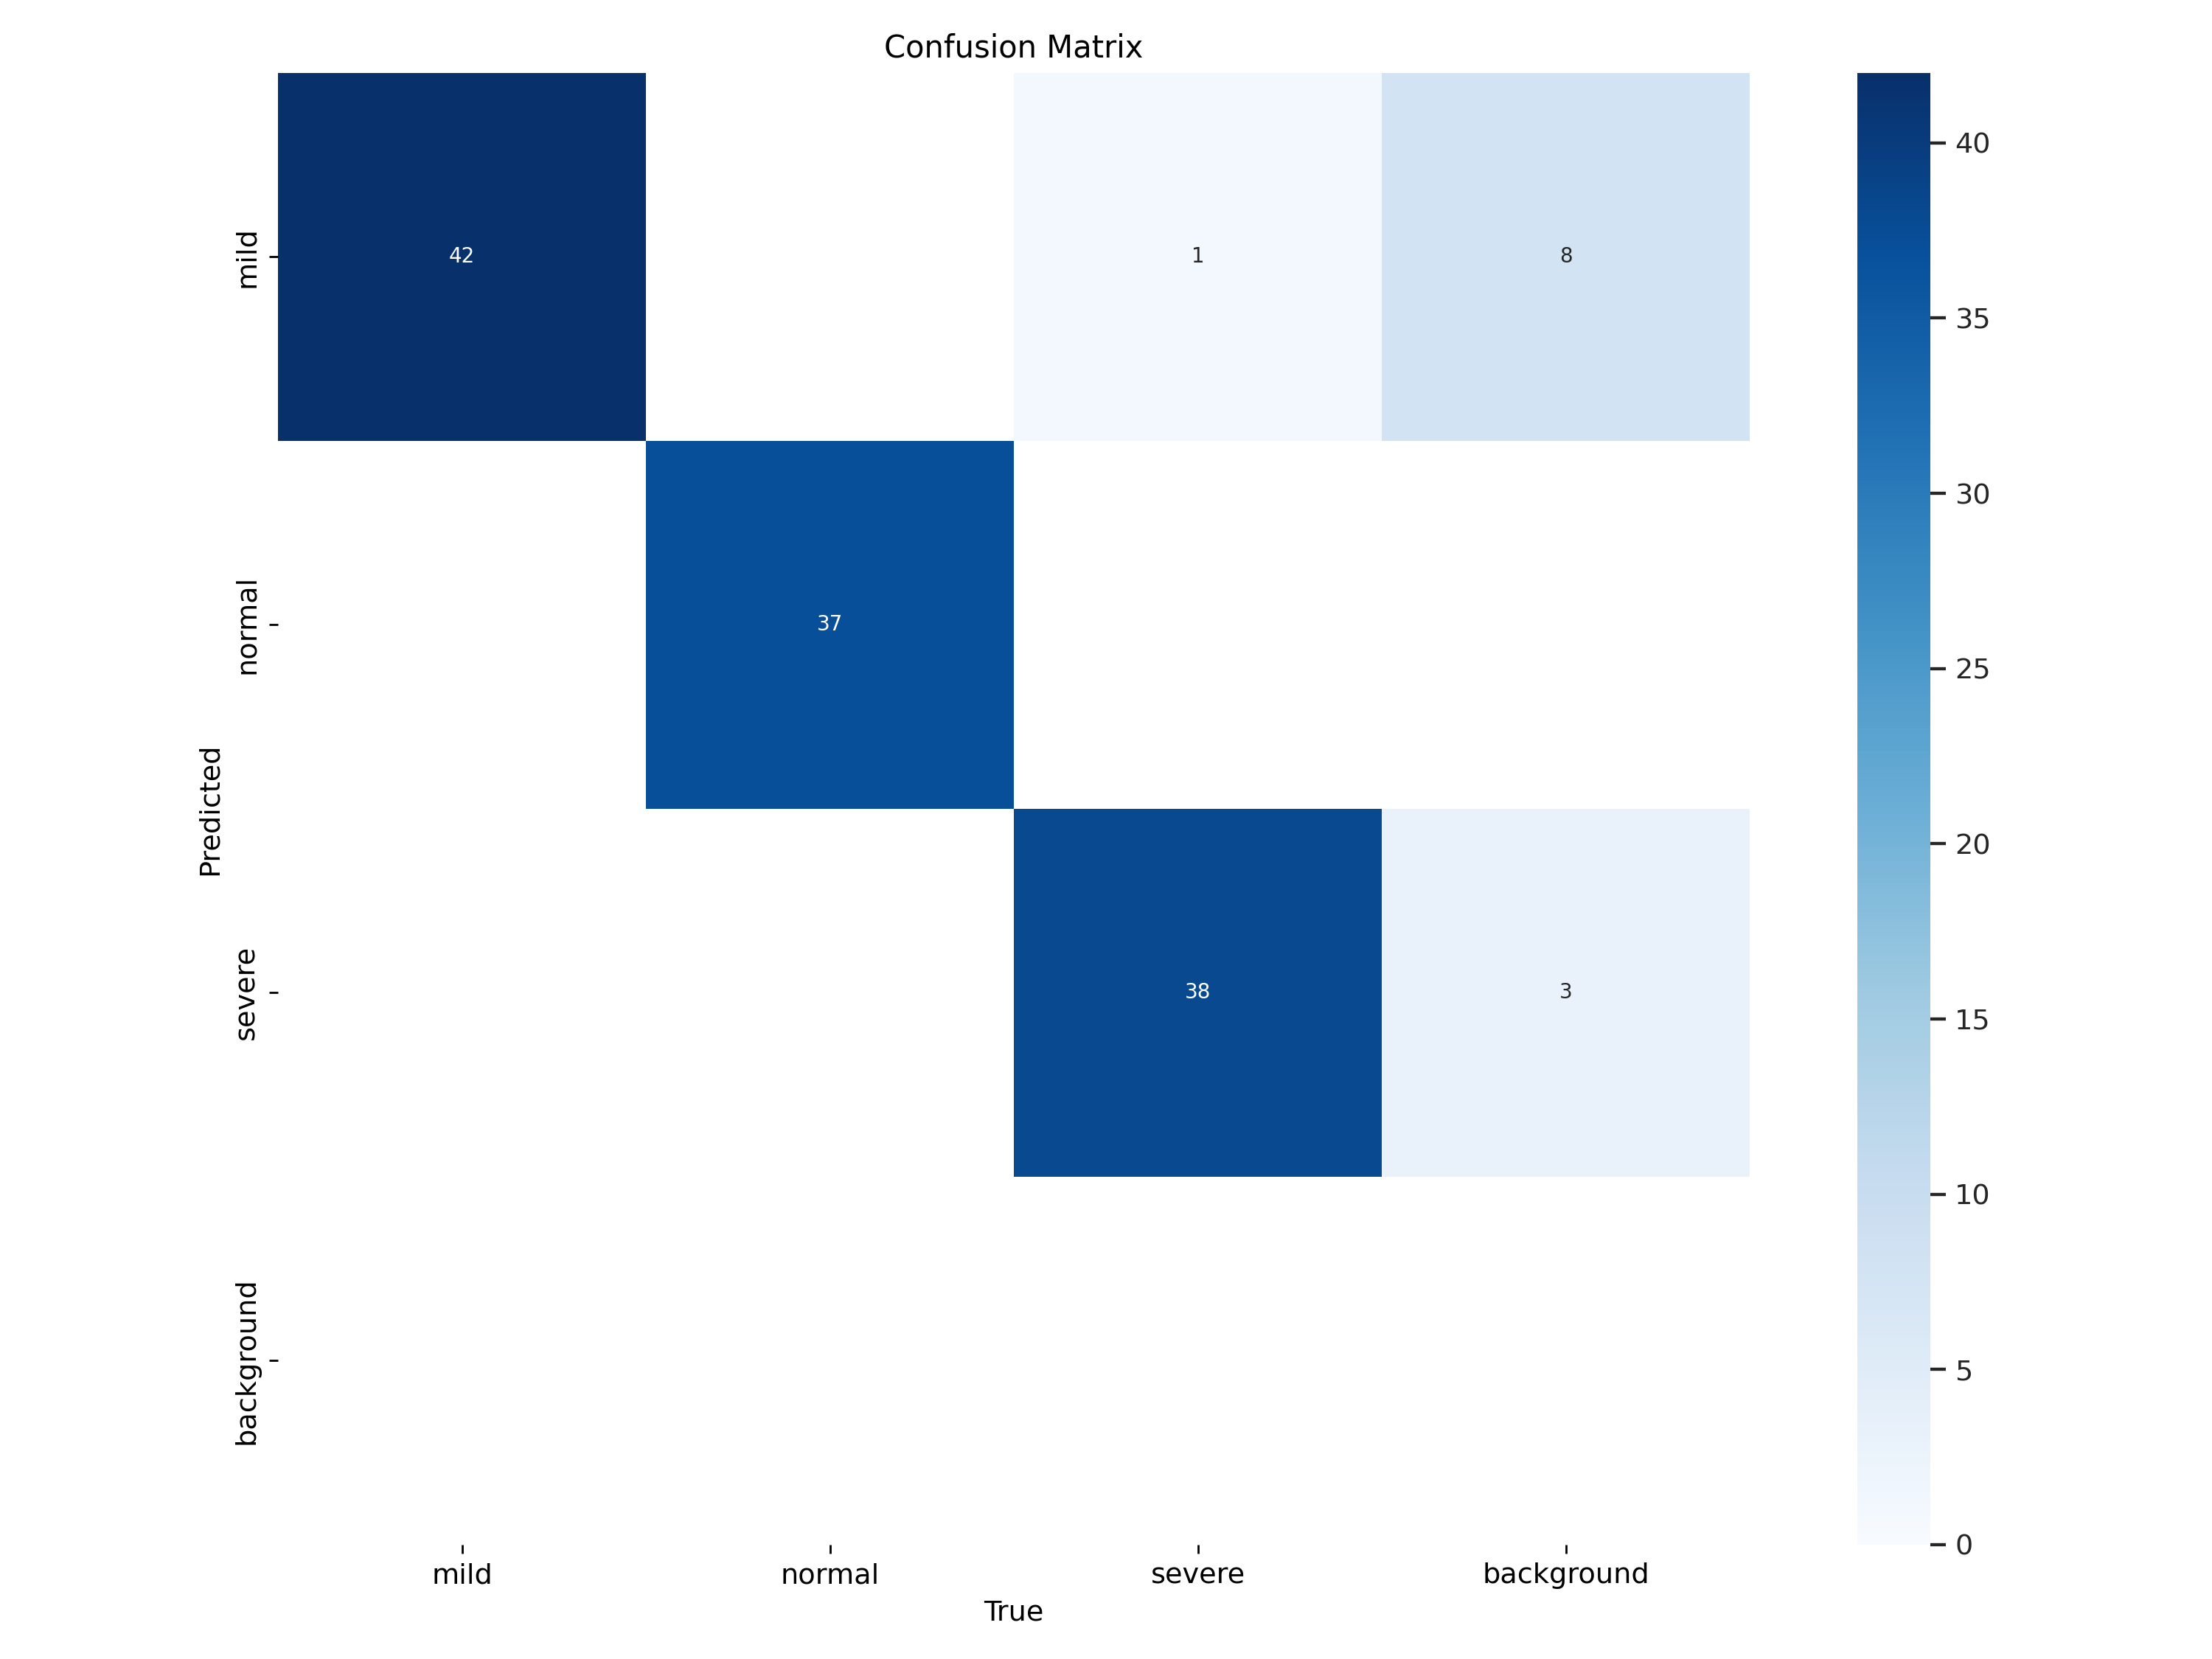

In [8]:
%cd {HOME}
import os

# List all files and directories in the runs/detect/train directory
print(os.listdir(f"{HOME}/runs/detect"))

# Find all directories within 'runs/detect' that start with 'train'
train_dirs = [d for d in os.listdir(f"{HOME}/runs/detect") if d.startswith("train")]

# If train directories exist, print their contents
if train_dirs:
    for train_dir in train_dirs:
        train_path = os.path.join(f"{HOME}/runs/detect", train_dir)
        print(f"Files in {train_path}:")
        print(os.listdir(train_path))

# Assuming the confusion matrix is in the most recent 'train' directory:
if train_dirs:
    latest_train_dir = sorted(train_dirs, reverse=True)[0]  # Get the latest train directory
    confusion_matrix_path = os.path.join(f"{HOME}/runs/detect", latest_train_dir, "confusion_matrix.png")
else:
    confusion_matrix_path = ""  # Set to empty string if no train directories found

# Display the image if it exists, otherwise print an error message
from IPython.display import display, Image
try:
    display(Image(filename=confusion_matrix_path, width=600))
except FileNotFoundError:
    print(f"Error: Confusion matrix not found at {confusion_matrix_path}. Check if training completed successfully and the file exists.")

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

/content
['train2', 'train']
Files in /content/runs/detect/train2:
['P_curve.png', 'results.png', 'args.yaml', 'events.out.tfevents.1731606148.cb7a22d6e37a.1810.0', 'val_batch2_labels.jpg', 'confusion_matrix.png', 'train_batch1040.jpg', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'train_batch1041.jpg', 'weights', 'R_curve.png', 'PR_curve.png', 'labels_correlogram.jpg', 'results.csv', 'train_batch1042.jpg', 'val_batch2_pred.jpg', 'val_batch1_pred.jpg', 'train_batch0.jpg', 'val_batch1_labels.jpg', 'confusion_matrix_normalized.png', 'F1_curve.png', 'train_batch1.jpg', 'labels.jpg', 'train_batch2.jpg']
Files in /content/runs/detect/train:
['args.yaml', 'weights']


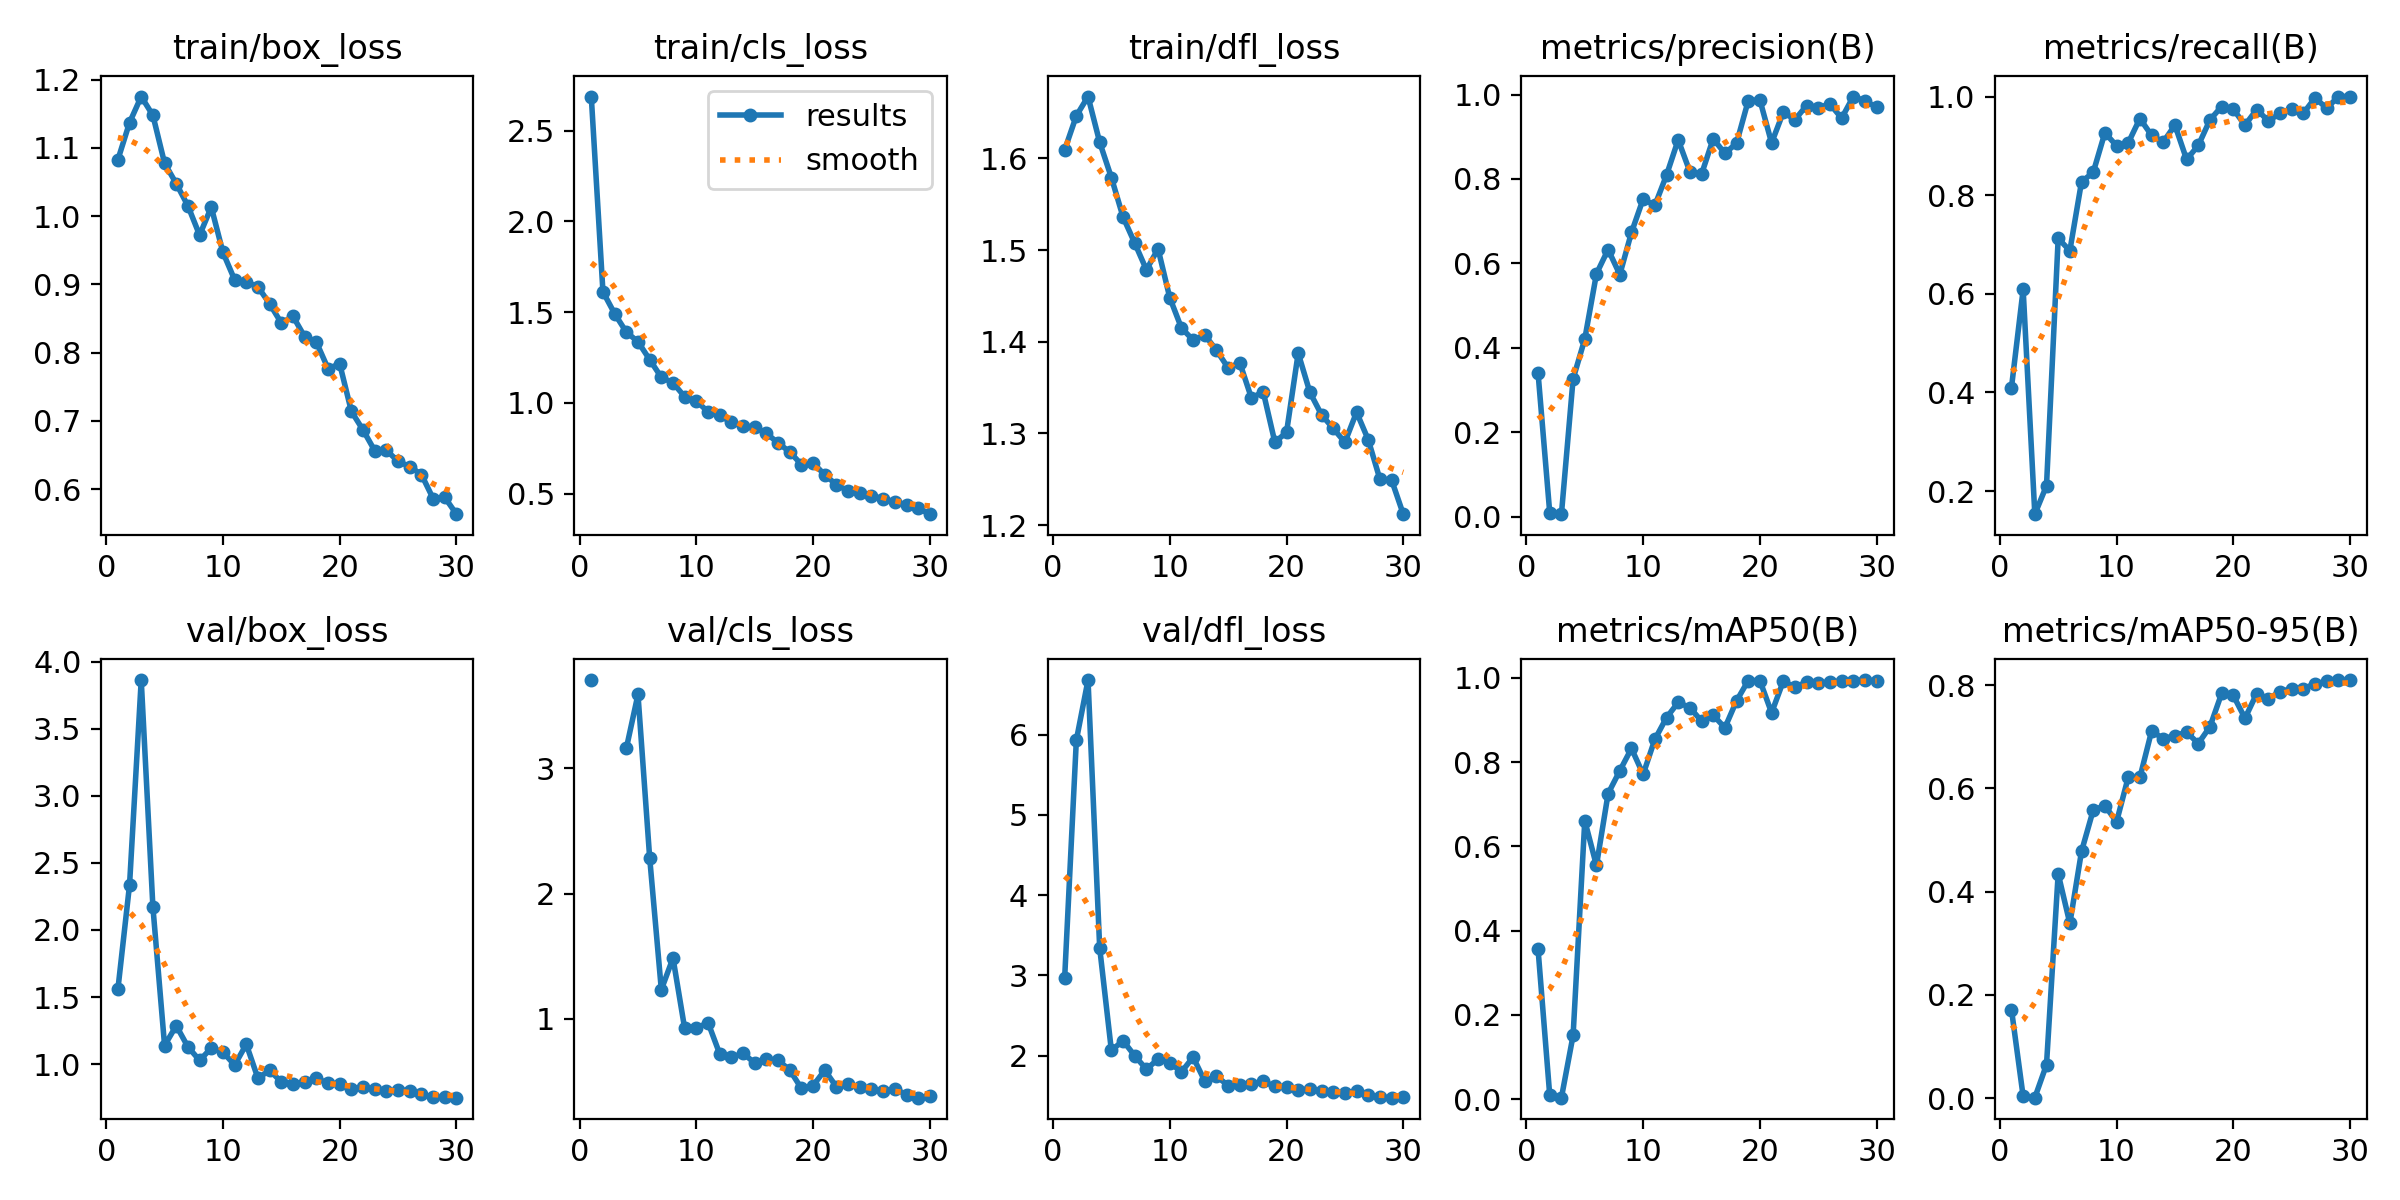

In [14]:
%cd {HOME}
import os

# List all files and directories in the runs/detect/train directory
print(os.listdir(f"{HOME}/runs/detect"))

# Find all directories within 'runs/detect' that start with 'train'
train_dirs = [d for d in os.listdir(f"{HOME}/runs/detect") if d.startswith("train")]

# If train directories exist, print their contents
if train_dirs:
    for train_dir in train_dirs:
        train_path = os.path.join(f"{HOME}/runs/detect", train_dir)
        print(f"Files in {train_path}:")
        print(os.listdir(train_path))

# Assuming the results.png is in the most recent 'train' directory:
if train_dirs:
    latest_train_dir = sorted(train_dirs, reverse=True)[0]  # Get the latest train directory
    results_png_path = os.path.join(f"{HOME}/runs/detect", latest_train_dir, "results.png")
else:
    results_png_path = ""  # Set to empty string if no train directories found


# Display the image if it exists, otherwise print an error message
from IPython.display import display, Image
try:
    display(Image(filename=results_png_path, width=600))
except FileNotFoundError:
    print(f"Error: results.png not found at {results_png_path}. Check if training completed successfully and the file exists.")

In [16]:
%cd {HOME}
import os

# List all files in the runs/detect/train directory
files_in_train_dir = os.listdir(f"{HOME}/runs/detect/train")

# Check if val_batch0_pred.jpg exists in the directory
if "val_batch0_pred.jpg" in files_in_train_dir:
    # If the file exists, display it
    from IPython.display import display, Image
    display(Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600))
else:
    # If the file doesn't exist, print an error message with available files
    print(f"Error: val_batch0_pred.jpg not found in {HOME}/runs/detect/train.")
    print(f"Available files in the directory: {files_in_train_dir}")

/content
Error: val_batch0_pred.jpg not found in /content/runs/detect/train.
Available files in the directory: ['args.yaml', 'weights']


## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.35s/it]
                   all         49       1174      0.928      0.741      0.825      0.547
                  ball         45         45      0.868      0.289      0.415      0.217
            goalkeeper         38         39      0.948      0.846      0.967      0.632
                player         49        973      0.977      0.962      0.988      0.749
               referee         49        117      0.919      0.867      0.931       0.59
Speed: 18.5ms preprocess, 26.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved 

## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 906, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 833, in torch_safe_load
    ckpt = torc

**NOTE:** Let's take a look at few results.

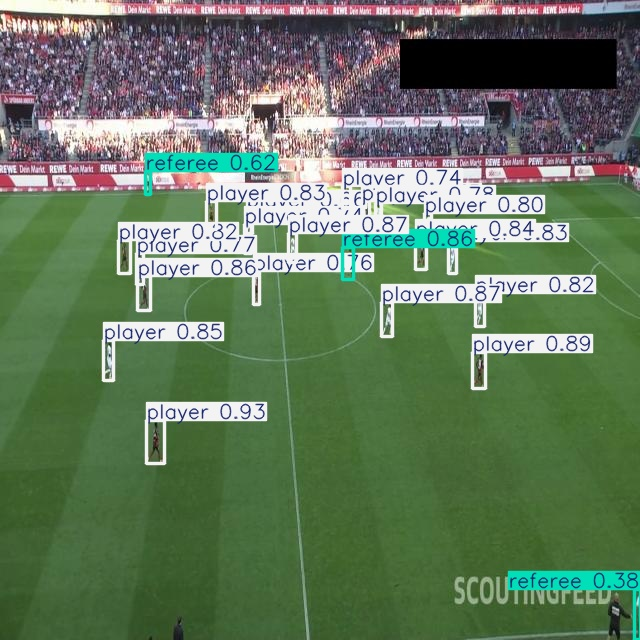

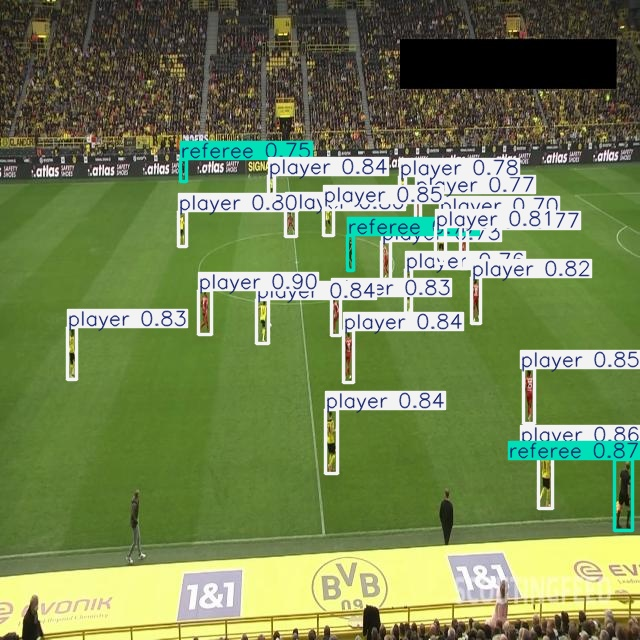

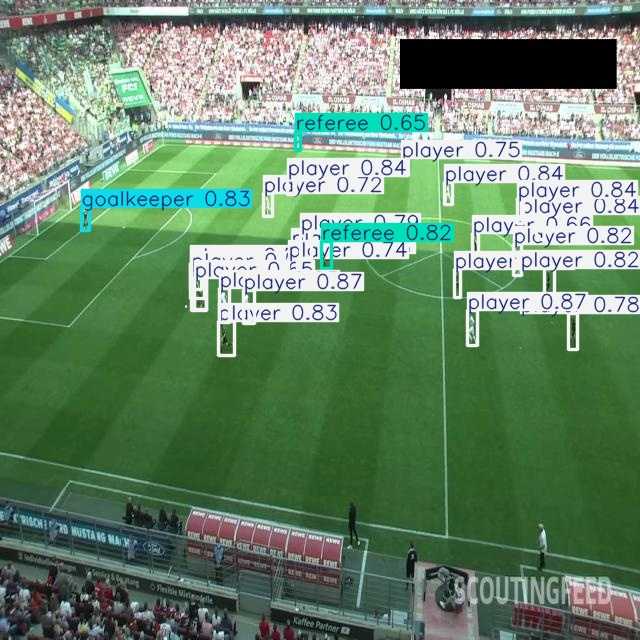

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/model-examples/football-players-obj-detection/2
Share your model with the world at: https://universe.roboflow.com/model-examples/football-players-obj-detection/model/2


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg


{'predictions': [{'x': 1227.0,
   'y': 527.5,
   'width': 50.0,
   'height': 77.0,
   'confidence': 0.9045102000236511,
   'class': 'player',
   'class_id': 2,
   'detection_id': '7bb0de78-c58d-454a-b693-c3f518f94f80',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 731.0,
   'y': 584.5,
   'width': 52.0,
   'height': 79.0,
   'confidence': 0.8924632668495178,
   'class': 'player',
   'class_id': 2,
   'detection_id': 'b3ea8a5a-5294-45c9-9221-ba8a6f0884b5',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1397.5,
   'y': 344.5,
   'width': 31.0,
   'height': 55.0,
   'confidence': 0.8912790417671204,
   'class': 'player',
   'class_id': 2,
   'detection_id': '5ef87756-163e-442c-ad88-35f3572750d5',
   '

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.